In [0]:
# Mounting local drive directory
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [0]:
BASE_DIR = os.path.join('/content','drive','Team Drives','AppliedMLforSocialGood','ProjectData', 'Bike Safety')
BASE_DIR

COLLISION_DIR = os.path.join(BASE_DIR, 'CHP collision data')
collision_file = os.path.join(COLLISION_DIR, 'CollisionRecords.txt')
collision_file

FORD_DIR = os.path.join(BASE_DIR, 'Ford bike data')
ford_bike_file = os.path.join(FORD_DIR, 'sf_hourly_aggregated.csv')

#SAMPLE_SIZE = 1000

SAMPLE_SIZE = 1000
ford_data = pd.read_csv(ford_bike_file)
ford_data.shape


(1036442, 6)

In [0]:
# convert the date to an appropriate pandas datetime format
ford_data['datehour'] = ford_data['date'].map(str) + ' ' + ford_data['hour'].map(str) + ':00:00'
ford_data['datehour'] = pd.to_datetime(ford_data.datehour)

# sort the data by datehour
ford_data = ford_data.sort_values('datehour')

In [0]:
#ford_data[''], ford_data['month'], ford_data['day'] = ford_data['date'].str.split('-', 2).str
from datetime import timedelta

# want 24hrs data, one day
steps = 1
step_length = timedelta(steps)

first_day = ford_data['date'].iloc[0]
last_day = ford_data['date'].iloc[-1]


In [0]:
station_data=ford_data.pivot_table(values='num_visits', 
                                   index=['datehour'], 
                                   columns='station_name', aggfunc=np.sum)


# Here we select the minimum and maximum dates that we want to fill in
min_date = first_day
max_date = last_day

# we generate a date_range for our re-indexing
# frequency by hour
dates = pd.date_range(min_date, max_date, freq='1H')
new_index = pd.Index(dates, name="datehour")

# add new dates, sort, replace NaN with 0
station_data = station_data.reindex(new_index)
station_data = station_data.sort_values('datehour')

station_data = station_data.fillna(0)

station_data.columns.values
#station_data


array(['11th St at Bryant St', '11th St at Natoma St',
       '14th St at Mission St', '15th St at Potrero Ave', '16th St Depot',
       '16th St Mission BART', '16th St Mission BART Station 2',
       '16th St at Prosper St',
       '17th & Folsom Street Park (17th St at Folsom St)',
       '17th St at Dolores St', '17th St at Valencia St',
       '18th St at Noe St', '19th St at Florida St',
       '19th St at Mission St', '1st St at Folsom St',
       '20th St at Bryant St', '20th St at Dolores St',
       '22nd St Caltrain Station', '22nd St at Dolores St',
       '23rd St and San Bruno Ave', '23rd St at San Bruno Ave',
       '23rd St at Tennessee St', '24th St at Bartlett St',
       '24th St at Chattanooga St', '29th St at Church St',
       '29th St at Tiffany Ave', '2nd St at Folsom St',
       '2nd St at S Park St', '2nd St at Townsend St',
       '2nd St at Townsend St - Coming Soon', '30th St at San Jose Ave',
       '3rd St at Townsend St', '4th St at 16th St',
       '4th

In [0]:
#station_data[station_data.columns.values[0]]
d = station_data.describe()

max_mean = 0
station = ''
for name in station_data.columns.values:
  if d[name]['mean'] > max_mean:
    max_mean = d[name]['mean']
    station = name

#print(station)
#print(max_mean)

print(d[station_data.columns.values[3]])

count    15409.000000
mean         0.523720
std          2.834222
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         46.000000
Name: 15th St at Potrero Ave, dtype: float64


In [0]:
# Find highest traffic stations
nonzeros = (station_data != 0).sum(axis=0)   # Get number of nonzero entries in columns
nonzeros = np.array(nonzeros)
nonzeros

#highest = [109,   134,   135,   45,    122,   58,    155,   145,   147,   68,    161,   153,   159,   31,   83,   144,  165,  130,  48,   162,  154,  44,   91,   10,   76]
#nonzcols= [11783, 11423, 11253, 11210, 11010, 10997, 10882, 10492, 10480, 10381, 10345, 10064, 10018, 9993, 9820, 9731, 9731, 9730, 9704, 9623, 9407, 9406, 9375, 9277, 9218]
highest = [109,134,135,45,122,58,155,145,147,68,161,153,159,31,83,144,165,130,48,162,154,44,91,10,76,41,110,103]
print(len(highest))
max_ = 0
id_ = ''
for idx in range(len(nonzeros)):
  if idx not in highest:
    if nonzeros[idx] > max_:
      max_ = nonzeros[idx]
      id_ = idx

id_ = 144
print(id_)
print(station_data.columns.values[id_])

28
144
San Francisco Caltrain (Townsend St at 4th St)


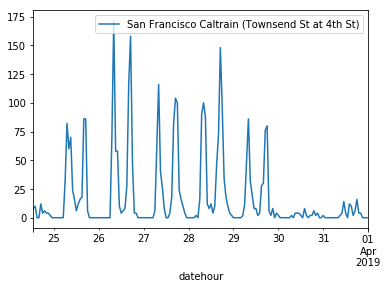

In [0]:
station_data[station_data.columns.values[id_]][-180:].plot(legend=True) 
plt.show()

In [0]:
# Sanboxing Regression Model

from sklearn.preprocessing import MinMaxScaler
from pandas import Series

# Use only 1 station for designing and testing the LSTM

label = station_data.columns.values[id_]
current = station_data[label]
print(len(current))

current = pd.DataFrame(current)
dates = current.index
dates = np.array(dates[:-1])
visits = np.array(current[label][:-1])
print(visits) 
print(len(visits))

## Aggregate by 7 day shifts
'''print(len(visits))
s = pd.DataFrame(visits)
s = s.groupby(s.index // 168).sum()
print(len(s))

s = np.array(s)
visits = []
for v in s:
  visits.append(v[0])
print(visits)'''

15409
[0. 0. 0. ... 0. 0. 0.]
15408


'print(len(visits))\ns = pd.DataFrame(visits)\ns = s.groupby(s.index // 168).sum()\nprint(len(s))\n\ns = np.array(s)\nvisits = []\nfor v in s:\n  visits.append(v[0])\nprint(visits)'

In [0]:
from sklearn.preprocessing import MinMaxScaler
from pandas import Series

# Normalization improves accuracy
visits = Series(visits)
# prepare data for normalization
visits = visits.values
visits = visits.reshape((len(visits), 1))
scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(visits)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
# normalize dataset
visits = scaler.transform(visits)
visits

Min: 0.000000, Max: 240.000000


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [0]:
# split into train and test sets
seq = visits
train_idx = int(len(seq) * 0.70)
validation_idx = int(len(seq) * 0.90)
train, validate, test = seq[0:train_idx], seq[train_idx:validation_idx], seq[validation_idx:len(seq)]
print(len(train), len(validate), len(test))

10785 3082 1541


In [0]:
#n_steps = 48 --> mean_squared_error: 0.0201
#n_steps = 12 --> Too few data points: mse is 0.028 and predictions are sometimes negative
#n_steps = 72 --> Too long, accuracy goes up to 0.0326
n_steps = 24

# Split such that we predict the next hour from the last n_steps
def split_sequence(sequence, n_steps):
	X, y = [], []
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return X, y

# learn from last N hours of active biker time 
X_train, y_train = split_sequence(train, n_steps)
X_validate, y_validate = split_sequence(validate, n_steps)
X_test, y_test = split_sequence(test, n_steps)

#for i in range(len(X)):
  #print(X[i], y[i])
  
X_train = np.array(X_train)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))[:,:,0]
y_train = np.array(y_train)
y_train = y_train.reshape((y_train.shape[0], 1))[:,0]

print(X_train.shape)
print(y_train.shape)

X_test = np.array(X_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))[:,:,0]
y_test = np.array(y_test)
y_test = y_test.reshape((y_test.shape[0], 1))[:,0]

print(X_test.shape)
print(y_test.shape)

X_validate = np.array(X_validate)
X_validate = X_validate.reshape((X_validate.shape[0], X_validate.shape[1], 1))[:,:,0]
y_validate = np.array(y_validate)
y_validate = y_validate.reshape((y_validate.shape[0], 1))[:,0]

print(X_validate.shape)
print(y_validate.shape)

#seq = seq.reshape((seq.shape[0], seq.shape[1], 1))

(10761, 24)
(10761,)
(1517, 24)
(1517,)
(3058, 24)
(3058,)


In [0]:
# Build Regressor Model
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras import regularizers
from keras.callbacks import ModelCheckpoint

checkpoint_dir = os.path.join('/content','drive','My Drive','Colab Notebooks','training_regression')
model_saved = checkpoint_dir + '/model-' + str(id_) + '.ckpt'
model_callback = ModelCheckpoint(model_saved, save_weights_only=True, verbose=1, period=150)
print(model_saved)

opt = SGD(lr=0.01)
model = Sequential()
model.add(Dense(16, input_dim=n_steps, kernel_initializer="ones", bias_initializer='ones'))
model.add(Dense(8))
model.add(Dense(1))
model.add(Activation("linear"))   # sigmoid increases the mse
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.summary()

/content/drive/My Drive/Colab Notebooks/training_regression/model-144.ckpt
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                400       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
_________________________________________________________________
activation_5 (Activation)    (None, 1)                 0         
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


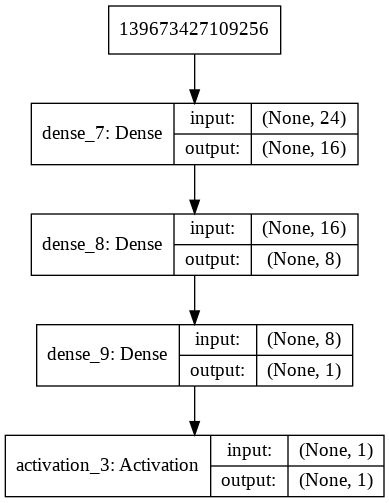

In [0]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

def show_model(model):
    plot_model(model, show_shapes=True, show_layer_names=True, to_file='temp_model.png')
    return Image(filename='temp_model.png')
  
show_model(model)

In [0]:
history = model.fit(X_train, y_train, validation_data=(X_validate, y_validate), epochs=150, callbacks = [model_callback], batch_size=2, verbose=1)

Train on 10761 samples, validate on 3058 samples
Epoch 1/150
10761/10761 [==============================] - 6s 583us/step - loss: 0.0374 - mean_squared_error: 0.0374 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 2/150
10761/10761 [==============================] - 6s 542us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 3/150
10761/10761 [==============================] - 6s 544us/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 4/150
10761/10761 [==============================] - 6s 545us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 5/150
10761/10761 [==============================] - 6s 543us/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 6/150
10761/10761 [==============================] - 6s 543us/step - loss: 0.0065 - mean_squared_err

In [0]:
print(model.metrics_names)
trainScore = model.evaluate(X_train, y_train, batch_size=2, verbose=0)
print(trainScore)
testScore = model.evaluate(X_test, y_test, batch_size=2, verbose=0)
print(testScore)
print(id_)


# highest = [109,134,135,45,122,   58,    155,   145,   147,   68,    161,153,159,31,83,144,165,130,  48,   162,  154,  44,   91,   10,   76]


# 134 - Powell St BART Station (Market St at 4th St)
# [0.007196218784974909, 0.007196218784974909] train
# [0.01509403321277405, 0.01509403321277405] test 
#
#
# 109 - Market St at 10th St
# ['loss', 'mean_squared_error']
# [0.003795688816825006, 0.003795688816825006] train
# [0.010910120704359236, 0.010910120704359236] test
#
#
# 155 - The Embarcadero at Sansome St
# [0.004900381745309821, 0.004900381745309821] train
# [0.005812619901715653, 0.005812619901715653] test
#
#
# 147 - San Francisco Ferry Building (Harry Bridges Plaza)
# [0.0057631735368393056, 0.0057631735368393056] train
# [0.009262737061113307, 0.009262737061113307] test
#
#
# 135 - Powell St BART Station (Market St at 5th St)
# [0.0039023096324841155, 0.0039023096324841155] train
# [0.009643953894581454, 0.009643953894581454] test 
#
#
# 45 - Berry St at 4th St  
# [0.0037661528111274075, 0.0037661528111274075]
# [0.010843039906370667, 0.010843039906370667]
#
#
# 122 - Montgomery St BART Station (Market St at 2nd St)
# [0.0036109760612532734, 0.0036109760612532734]
# [0.009461466851548951, 0.009461466851548951]
#
#
# 58 - Civic Center/UN Plaza BART Station (Market St at McAllister St)
# [0.005713873868359169, 0.005713873868359169]
# [0.012705036241354632, 0.012705036241354632]
#
# 
# 153 - Steuart St at Market St
# [0.004536912821873099, 0.004536912821873099]
# [0.007771752013630682, 0.007771752013630682]
#
#
# 145 - San Francisco Caltrain Station 2  (Townsend St at 4th St)
# [0.0022686392711562062, 0.0022686392711562062]
# [0.006626298121820577, 0.006626298121820577]
#
#
# 31 - 3rd St at Townsend St
# [0.0019321919590080305, 0.0019321919590080305]
# [0.002933103805648103, 0.002933103805648103]
#
#
# 161 - Union Square (Powell St at Post St)
# [0.007283467644234679, 0.007283467644234679]
# [0.013400518744058756, 0.013400518744058756]
#
# 68 - Embarcardero BART Station (Beale St at Market St)
# [0.0037521533552513993, 0.0037521533552513993]
# [0.0070896947282645196, 0.0070896947282645196]
#
# 159 - Townsend St at 7th St
# [0.005064887835122279, 0.005064887835122279]
# [0.009026725768825346, 0.009026725768825346]
#
# 
# 130 - Post St at Kearny St
# [0.006507830924113876, 0.006507830924113876]
# [0.012178927778559053, 0.012178927778559053]
#
# 
# 154 - The Embarcadero at Bryant St
# [0.006713933328869939, 0.006713933328869939]
# [0.009957014641248074, 0.009957014641248074]
#
# 
# 83 - Golden Gate Ave at Polk St
# [0.0055177430371801265, 0.0055177430371801265]
# [0.005753836738884649, 0.005753836738884649]
#
#
# 144 - San Francisco Caltrain (Townsend St at 4th St)   -> okay results on tests
# [0.004460821444166468, 0.004460821444166468]
# [0.005294485063259417, 0.005294485063259417]
#
#
# 165 - Valencia St at 24th St  -> okay test results
# [0.007172718825670814, 0.007172718825670814]
# [0.009477435145749103, 0.009477435145749103]
#
#
# 48 - Broadway at Kearny
# [0.006180913064339195, 0.006180913064339195]
# [0.011778583477076493, 0.011778583477076493]
#
#
# 162 - Valencia St at 16th St
# [0.006168011954580481, 0.006168011954580481]
# [0.008134862208834436, 0.008134862208834436]
#
#
# 44 - Beale St at Harrison St
# [0.0037779009016872915, 0.0037779009016872915]
# [0.009353114559767962, 0.009353114559767962]
#
#
# 91 - Howard St at Beale St
# [0.005784297083671761, 0.005784297083671761]
# [0.0094951339930856, 0.0094951339930856]
#
#
# 10 - 17th St at Valencia St
# [0.004078288103145803, 0.004078288103145803]
# [0.008763620467595237, 0.008763620467595237]
#
#
# 76 - Folsom St at 3rd St
# [0.005454330375637602, 0.005454330375637602]
# [0.014024140685540917, 0.014024140685540917]
#
#


# Top 25 Average training error = 0.00501215268
# Top 25 Average testing error = 0.00939169022



# 41 - 8th St at Ringold St
# [0.004165347648423825, 0.004165347648423825]
# [0.009210744858250044, 0.009210744858250044]

# 110 - Market St at Dolores St
# [0.0021633456017155217, 0.0021633456017155217]
# [0.004562437554625339, 0.004562437554625339]
#
# 103 - Laguna St at Hayes St
# [0.005060325370526275, 0.005060325370526275]
# [0.011496860994266148, 0.011496860994266148]


station_data.columns.values[id_]

# 150 epochs - beyond this is just redundant 

['loss', 'mean_squared_error']
[0.005060325370526275, 0.005060325370526275]
[0.011496860994266148, 0.011496860994266148]
103


'Laguna St at Hayes St'

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])


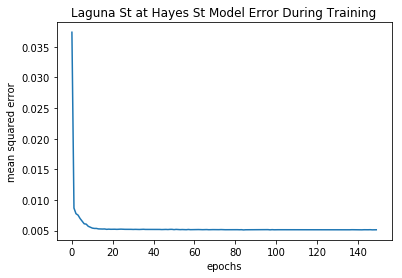

In [0]:
#
# plot mse
print(history.history.keys())
plt.plot(history.history['mean_squared_error'])
plt.title(station_data.columns.values[id_] + ' Model Error During Training')
plt.ylabel('mean squared error')
plt.xlabel('epochs')
plt.show()

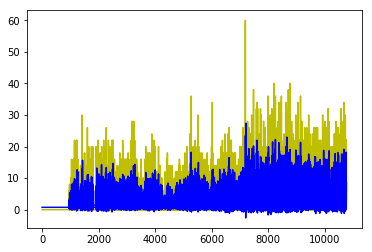

In [0]:
# invert scaler on results

training_predictions = model.predict(X_train)
training_predictions = scaler.inverse_transform(training_predictions)
training_y = scaler.inverse_transform(y_train.reshape(-1,1))

x_list = range(len(training_predictions))
plt.plot(x_list, training_y, 'y', x_list, training_predictions, 'b')

In [0]:
time_idx = pd.DataFrame(station_data.index[validation_idx+24:-1])
x_axis = time_idx.values

Text(0.5, 0, 'Date')

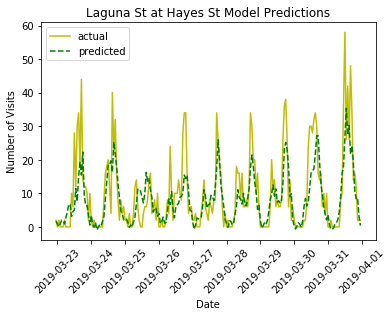

In [0]:
testing_predictions = model.predict(X_test)
testing_predictions = scaler.inverse_transform(testing_predictions)
testing_y = scaler.inverse_transform(y_test.reshape(-1,1))

x_list = range(len(testing_predictions[1300:]))
plt.plot(x_axis[1300:], testing_y[1300:], 'y', x_axis[1300:], testing_predictions[1300:], 'g--')
plt.legend(['actual', 'predicted'])
plt.title(station_data.columns.values[id_] + ' Model Predictions')
plt.xticks(rotation=45)
plt.ylabel('Number of Visits')
plt.xlabel('Date')

In [0]:
import os

predictions_dir = os.path.join('/content','drive','My Drive','Colab Notebooks','predictions')
header = [station_data.columns.values[id_]]
int_predictions = [int(x) for x in testing_predictions]
predictions = pd.DataFrame(int_predictions, columns=header)
predictions.to_csv(predictions_dir + '/predictions_' + station_data.columns.values[id_] + '.csv')
#predictions.to_csv(predictions_dir + '/predictions_Civic Center BART Station (Market St at McAllister St).csv')

In [0]:
## Loading regression model from storage
from keras.models import Sequential
from keras.layers import Dense, Activation


# highest = [109, 134, 135, 45, 122, 58, 155, 145, 147, 68, 161, 153, 159, 31, 83, 144, 165, 130, 48, 162, 154, 44, 91, 10, 76]
current_id = 144 # Load all data for this ID in entire notebook
saved_models_dir = os.path.join('/content', 'drive', 'My Drive', 'Colab Notebooks', 'training_regression')
#saved_models_dir = os.path.join('/content', 'drive', 'My Drive', 'Colab Notebooks', 'training_LSTM')

modelrestored = Sequential()
modelrestored.add(Dense(16, input_dim=n_steps, kernel_initializer="ones", bias_initializer='ones'))
modelrestored.add(Dense(8))
modelrestored.add(Dense(1))
modelrestored.add(Activation("linear"))   # sigmoid increases the mse
modelrestored.compile(loss="mse", optimizer="adam", metrics=["mse"])

model_load_from = saved_models_dir + '/model-' + str(current_id) + '.ckpt'
print(model_load_from)
modelrestored.load_weights(model_load_from)

/content/drive/My Drive/Colab Notebooks/training_regression/model-144.ckpt


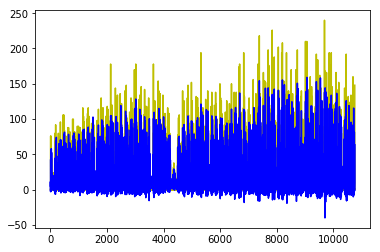

In [0]:
# invert scaler on results

training_predictions = modelrestored.predict(X_train)
training_predictions = scaler.inverse_transform(training_predictions)
training_y = scaler.inverse_transform(y_train.reshape(-1,1))

x_list = range(len(training_predictions))
plt.plot(x_list, training_y, 'y', x_list, training_predictions, 'b')

In [0]:
time_idx = pd.DataFrame(station_data.index[validation_idx+24:-1])
x_axis = time_idx.values

234


Text(0.5, 0, 'Date')

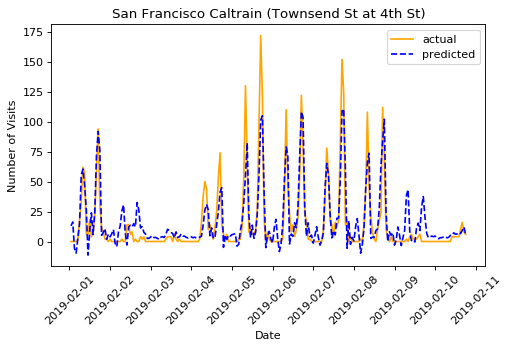

In [0]:
testing_predictions = modelrestored.predict(X_test)
testing_predictions = scaler.inverse_transform(testing_predictions)
testing_y = scaler.inverse_transform(y_test.reshape(-1,1))
fig=plt.figure(figsize=(7, 4), dpi= 80, facecolor='w', edgecolor='k')

# Last 10 days: [-240:]
days = 4
x_list = range(len(testing_predictions[6+(days*24):240+(days*24)]))
print(len(x_list))
plt.plot(x_axis[6+(days*24):240+(days*24)], testing_y[6+(days*24):240+(days*24)], 'orange', linestyle="-")
plt.plot(x_axis[6+(days*24):240+(days*24)], testing_predictions[6+(days*24):240+(days*24)], 'b', linestyle="--")
plt.legend(['actual', 'predicted'])
plt.title(station_data.columns.values[current_id])
plt.xticks(rotation=45)
plt.ylabel('Number of Visits')
plt.xlabel('Date')

217


Text(0.5, 0, 'Date')

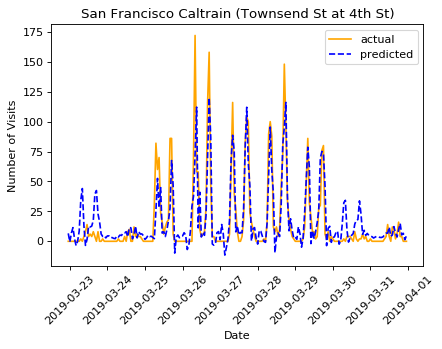

In [0]:
testing_predictions = modelrestored.predict(X_test)
testing_predictions = scaler.inverse_transform(testing_predictions)
testing_y = scaler.inverse_transform(y_test.reshape(-1,1))
fig=plt.figure(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')

# Last 10 days: [-240:]
x_list = range(len(testing_predictions[1300:]))
print(len(x_list))
plt.plot(x_axis[1300:], testing_y[1300:], 'orange', linestyle="-")
plt.plot(x_axis[1300:], testing_predictions[1300:], 'b', linestyle="--")
plt.legend(['actual', 'predicted'])
plt.title(station_data.columns.values[current_id])
plt.xticks(rotation=45)
plt.ylabel('Number of Visits')
plt.xlabel('Date')

In [0]:
time_idx = pd.DataFrame(station_data.index[validation_idx+24:-1])

In [0]:
predictions_dir = os.path.join('/content','drive','Team Drives','AppliedMLforSocialGood','ProjectData', 'Bike Safety', 'Prediction Data')

station1 = pd.DataFrame(pd.read_csv(predictions_dir + '/predictions_Market St at 10th St.csv')).clip(lower=0)
station2 = pd.DataFrame(pd.read_csv(predictions_dir + '/predictions_Powell St BART Station (Market St at 4th St).csv')).clip(lower=0)
station3 = pd.DataFrame(pd.read_csv(predictions_dir + '/predictions_Powell St BART Station (Market St at 5th St).csv')).clip(lower=0)
station4 = pd.DataFrame(pd.read_csv(predictions_dir + '/predictions_San Francisco Ferry Building (Harry Bridges Plaza).csv')).clip(lower=0)
station5 = pd.DataFrame(pd.read_csv(predictions_dir + '/predictions_The Embarcadero at Sansome St.csv')).clip(lower=0)
station6 = pd.DataFrame(pd.read_csv(predictions_dir + '/predictions_3rd St at Townsend St.csv')).clip(lower=0)
station7 = pd.DataFrame(pd.read_csv(predictions_dir + '/predictions_Berry St at 4th St.csv')).clip(lower=0)
station8 = pd.DataFrame(pd.read_csv(predictions_dir + '/predictions_Civic Center UN Plaza BART Station (Market St at McAllister St).csv')).clip(lower=0)
station9 = pd.DataFrame(pd.read_csv(predictions_dir + '/predictions_Montgomery St BART Station (Market St at 2nd St).csv')).clip(lower=0)
station10 = pd.DataFrame(pd.read_csv(predictions_dir + '/predictions_San Francisco Caltrain Station 2  (Townsend St at 4th St).csv')).clip(lower=0)
station11 = pd.DataFrame(pd.read_csv(predictions_dir + '/predictions_Steuart St at Market St.csv')).clip(lower=0)

station12 = pd.DataFrame(pd.read_csv(predictions_dir + '/predictions_Valencia St at 24th St.csv')).clip(lower=0)
station13 = pd.DataFrame(pd.read_csv(predictions_dir + '/predictions_Valencia St at 16th St.csv')).clip(lower=0)
station14 = pd.DataFrame(pd.read_csv(predictions_dir + '/predictions_Union Square (Powell St at Post St).csv')).clip(lower=0)
station15 = pd.DataFrame(pd.read_csv(predictions_dir + '/predictions_Townsend St at 7th St.csv')).clip(lower=0)
station16 = pd.DataFrame(pd.read_csv(predictions_dir + '/predictions_The Embarcadero at Bryant St.csv')).clip(lower=0)
station17 = pd.DataFrame(pd.read_csv(predictions_dir + '/predictions_San Francisco Caltrain (Townsend St at 4th St).csv')).clip(lower=0)
station18 = pd.DataFrame(pd.read_csv(predictions_dir + '/predictions_Post St at Kearny St.csv')).clip(lower=0)
station19 = pd.DataFrame(pd.read_csv(predictions_dir + '/predictions_Golden Gate Ave at Polk St.csv')).clip(lower=0)
station20 = pd.DataFrame(pd.read_csv(predictions_dir + '/predictions_Embarcadero BART Station (Beale St at Market St).csv')).clip(lower=0)
station21 = pd.DataFrame(pd.read_csv(predictions_dir + '/predictions_Broadway at Kearny.csv')).clip(lower=0)

station22 = pd.DataFrame(pd.read_csv(predictions_dir + '/predictions_Howard St at Beale St.csv')).clip(lower=0)
station23 = pd.DataFrame(pd.read_csv(predictions_dir + '/predictions_Folsom St at 3rd St.csv')).clip(lower=0)
station24 = pd.DataFrame(pd.read_csv(predictions_dir + '/predictions_Beale St at Harrison St.csv')).clip(lower=0)
station25 = pd.DataFrame(pd.read_csv(predictions_dir + '/predictions_17th St at Valencia St.csv')).clip(lower=0)
#station26 = pd.DataFrame(pd.read_csv(predictions_dir + '/predictions_8th St at Ringold St.csv')).clip(lower=0)

allstations = [time_idx, station1, station2, station3, station4, station5, station6, station7, station8, station9, station10, station11, station12, station13, station14, station15, station16, station17, station18, station19, station20, station21, station22, station23, station24, station25]

In [0]:
preds = pd.concat(allstations, axis=1)
named = [c for c in preds.columns if c != 'Unnamed: 0']

preds = preds[named]
preds

,datehour,Market St at 10th St,Powell St BART Station (Market St at 4th St),Powell St BART Station (Market St at 5th St),San Francisco Ferry Building (Harry Bridges Plaza),The Embarcadero at Sansome St,3rd St at Townsend St,Berry St at 4th St,Civic Center/UN Plaza BART Station (Market St at McAllister St),Montgomery St BART Station (Market St at 2nd St),San Francisco Caltrain Station 2 (Townsend St at 4th St),Steuart St at Market St,Valencia St at 24th St,Valencia St at 16th St,Union Square (Powell St at Post St),Townsend St at 7th St,The Embarcadero at Bryant St,San Francisco Caltrain (Townsend St at 4th St),Post St at Kearny St,Golden Gate Ave at Polk St,Embarcadero BART Station (Beale St at Market St),Broadway at Kearny,Howard St at Beale St,Folsom St at 3rd St,Beale St at Harrison St,17th St at Valencia St
0,2019-01-27 19:00:00,37,16,19,12,8,8,5,15,2,5,1,11,0,7,1,19,9,5,2,4,7,4,4,8,9
1,2019-01-27 20:00:00,25,15,9,1,6,5,8,14,7,3,6,4,0,6,2,9,8,4,1,4,5,5,4,3,8
2,2019-01-27 21:00:00,14,8,13,7,7,8,6,8,3,0,2,4,0,4,4,2,2,6,2,3,3,6,3,0,7
3,2019-01-27 22:00:00,13,3,5,2,3,5,7,6,0,4,4,6,0,3,1,3,7,7,2,0,3,4,1,4,3
4,2019-01-27 23:00:00,4,5,1,15,2,3,4,5,1,5,1,6,0,3,0,3,1,3,1,2,2,5,1,2,2
5,2019-01-28 00:00:00,10,2,3,12,5,6,4,7,3,1,3,1,0,3,0,2,3,1,3,3,0,1,2,3,1
6,2019-01-28 01:00:00,6,1,5,4,1,2,3,4,0,0,3,1,0,2,1,2,6,0,2,0,0,2,0,1,1
7,2019-01-28 02:00:00,0,2,1,4,0,0,1,2,1,1,0,2,0,0,0,4,4,0,2,0,0,4,1,1,1
8,2019-01-28 03:00:00,1,1,0,0,0,0,3,1,0,0,0,2,0,0,0,2,4,1,1,0,1,2,1,0,0
9,2019-01-28 04:00:00,0,0,0,0,1,1,3,0,0,1,0,0,0,0,0,0,3,2,2,0,0,2,0,0,0


In [0]:
my_predictions_dir = os.path.join('/content','drive','My Drive', 'Colab Notebooks', 'predictions')

preds.to_csv(my_predictions_dir + '/predictions_all_stations.csv')


In [0]:
import statistics

train_mse = [0.007196218784974909, 0.003795688816825006, 0.004900381745309821, 0.0057631735368393056, 0.0039023096324841155, 0.0037661528111274075,
             0.0036109760612532734, 0.005713873868359169, 0.004536912821873099, 0.0022686392711562062, 0.0019321919590080305, 0.007283467644234679,
             0.0037521533552513993, 0.005064887835122279, 0.006507830924113876, 0.006713933328869939, 0.0055177430371801265, 0.004460821444166468,
             0.007172718825670814, 0.006180913064339195, 0.006168011954580481, 0.0037779009016872915, 0.005784297083671761, 0.004078288103145803,
             0.005454330375637602]
print(statistics.median(train_mse))


test_mse = [0.01509403321277405, 0.010910120704359236, 0.005812619901715653, 0.009262737061113307, 0.009643953894581454, 0.010843039906370667, 
            0.009461466851548951, 0.012705036241354632, 0.007771752013630682, 0.006626298121820577, 0.002933103805648103, 0.013400518744058756,
            0.0070896947282645196, 0.009026725768825346, 0.012178927778559053, 0.009957014641248074, 0.005753836738884649, 0.005294485063259417,
            0.009477435145749103, 0.011778583477076493, 0.008134862208834436, 0.009353114559767962, 0.0094951339930856, 0.008763620467595237,
            0.014024140685540917]
print(statistics.median(test_mse))

0.005064887835122279
0.009461466851548951


In [0]:
# 134 - Powell St BART Station (Market St at 4th St)
# [0.007196218784974909, 0.007196218784974909] train
# [0.01509403321277405, 0.01509403321277405] test 
#
#
# 109 - Market St at 10th St
# ['loss', 'mean_squared_error']
# [0.003795688816825006, 0.003795688816825006] train
# [0.010910120704359236, 0.010910120704359236] test
#
#
# 155 - The Embarcadero at Sansome St
# [0.004900381745309821, 0.004900381745309821] train
# [0.005812619901715653, 0.005812619901715653] test
#
#
# 147 - San Francisco Ferry Building (Harry Bridges Plaza)
# [0.0057631735368393056, 0.0057631735368393056] train
# [0.009262737061113307, 0.009262737061113307] test
#
#
# 135 - Powell St BART Station (Market St at 5th St)
# [0.0039023096324841155, 0.0039023096324841155] train
# [0.009643953894581454, 0.009643953894581454] test 
#
#
# 45 - Berry St at 4th St  
# [0.0037661528111274075, 0.0037661528111274075]
# [0.010843039906370667, 0.010843039906370667]
#
#
# 122 - Montgomery St BART Station (Market St at 2nd St)
# [0.0036109760612532734, 0.0036109760612532734]
# [0.009461466851548951, 0.009461466851548951]
#
#
# 58 - Civic Center/UN Plaza BART Station (Market St at McAllister St)
# [0.005713873868359169, 0.005713873868359169]
# [0.012705036241354632, 0.012705036241354632]
#
# 
# 153 - Steuart St at Market St
# [0.004536912821873099, 0.004536912821873099]
# [0.007771752013630682, 0.007771752013630682]
#
#
# 145 - San Francisco Caltrain Station 2  (Townsend St at 4th St)
# [0.0022686392711562062, 0.0022686392711562062]
# [0.006626298121820577, 0.006626298121820577]
#
#
# 31 - 3rd St at Townsend St
# [0.0019321919590080305, 0.0019321919590080305]
# [0.002933103805648103, 0.002933103805648103]
#
#
# 161 - Union Square (Powell St at Post St)
# [0.007283467644234679, 0.007283467644234679]
# [0.013400518744058756, 0.013400518744058756]
#
# 68 - Embarcardero BART Station (Beale St at Market St)
# [0.0037521533552513993, 0.0037521533552513993]
# [0.0070896947282645196, 0.0070896947282645196]
#
# 159 - Townsend St at 7th St
# [0.005064887835122279, 0.005064887835122279]
# [0.009026725768825346, 0.009026725768825346]
#
# 
# 130 - Post St at Kearny St
# [0.006507830924113876, 0.006507830924113876]
# [0.012178927778559053, 0.012178927778559053]
#
# 
# 154 - The Embarcadero at Bryant St
# [0.006713933328869939, 0.006713933328869939]
# [0.009957014641248074, 0.009957014641248074]
#
# 
# 83 - Golden Gate Ave at Polk St
# [0.0055177430371801265, 0.0055177430371801265]
# [0.005753836738884649, 0.005753836738884649]
#
#
# 144 - San Francisco Caltrain (Townsend St at 4th St)   -> okay results on tests
# [0.004460821444166468, 0.004460821444166468]
# [0.005294485063259417, 0.005294485063259417]
#
#
# 165 - Valencia St at 24th St  -> okay test results
# [0.007172718825670814, 0.007172718825670814]
# [0.009477435145749103, 0.009477435145749103]
#
#
# 48 - Broadway at Kearny
# [0.006180913064339195, 0.006180913064339195]
# [0.011778583477076493, 0.011778583477076493]
#
#
# 162 - Valencia St at 16th St
# [0.006168011954580481, 0.006168011954580481]
# [0.008134862208834436, 0.008134862208834436]
#
#
# 44 - Beale St at Harrison St
# [0.0037779009016872915, 0.0037779009016872915]
# [0.009353114559767962, 0.009353114559767962]
#
#
# 91 - Howard St at Beale St
# [0.005784297083671761, 0.005784297083671761]
# [0.0094951339930856, 0.0094951339930856]
#
#
# 10 - 17th St at Valencia St
# [0.004078288103145803, 0.004078288103145803]
# [0.008763620467595237, 0.008763620467595237]
#
#
# 76 - Folsom St at 3rd St
# [0.005454330375637602, 0.005454330375637602]
# [0.014024140685540917, 0.014024140685540917]
#